### **Analyzing Customer Survey Data for Delivery Service**
---
### Introduction

Customer satisfaction is the most important aspect of any business, and when it deals with delivery services, it becomes even more critical. It helps to know what drives customers to be satisfied with a particular service, so businesses may know exactly how to serve better, retain customers, and enhance their competitive edge. Here, we consider customer survey data for insight into the various factors in overall delivery experiences.

We will analyze the relationships of several variables in survey data, segment the customers with respect to their ratings, and develop a predictive model to anticipate customer satisfaction. This could help us find out key areas of improvement and drivers of positive experiences.
Objective

#### Objective

In this code, we aim to:

1. **Load and Preview the Dataset**
2. **Handle Missing Values and Data Preparation**
3. **Plot Distribution of Ratings**
4. **Create and Display Correlation Matrix**
5. **Cluster Analysis**
6. **Calculate Average Ratings and Analyze by Order Accuracy**
7. **Build and Evaluate a Random Forest Classifier**
8. **Feature Importance**



### 1. Load and Preview the Dataset
- Use the `pd.read_csv` to load this dataset, and then use `data.head()` to view the first few rows.
- Use `data.info()` to see if there are missing values and what types are in your dataset.
- First of all, it is always good to review your data to understand the structure and have an idea of how to process the data.
- It helps in finding such problems as missing or incorrectly inputted data types that need handling before analysis can take place.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset from a CSV file
data = pd.read_csv('Customer-survey-data.csv')

# Print the first few rows of the dataset to see what the data looks like
print("Initial Data Preview:")
print(data.head())

# Print information about the dataset, including data types and missing values
print("\nData Information:")
print(data.info())


Initial Data Preview:
   Customer  \
0         1   
1         2   
2         3   
3         4   
4         5   

   How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied  \
0                                                5.0                                                                                                          
1                                                3.0                                                                                                          
2                                                4.0                                                                                                          
3                                                5.0                                                                                                          
4                                                2.0                                        

### Analysis of Data

- **Initial Data Preview:** Data includes customer feedback related to delivery experience, food quality, speed of delivery, and order correctness. The ratings are on a scale of 1 to 5, while the order correctness is "Yes" or "No".

- **Data Information:** The dataset has 10,616 entries and 5 columns. There are some missing values:
  - Overall delivery experience: 10198 non-null entries
  - Food quality: 10364 non-null entries
  - Speed of delivery: 10377 non-null entries
  - Order accuracy: 9956 non-null entries

- **Data Types:**
  - `Customer` is an integer.
  - Satisfaction ratings are of float type while the order accuracy is of object type.

### 2. Handle Missing Values and Data Preparation
- Clean the data by dropping rows that contain NaN values using `data.dropna()`.
- Convert categorical columns like Yes/No responses to numeric for analysis.
- Column renaming is done to make it easy and readable while analysis.
- Drop duplicates from the data.drop_duplicates() to ensure that every entry in data is unique and valid.

In [2]:
# Handle missing values if any (e.g., fill or drop)
data.dropna(inplace=True)  # Example: drop rows with missing values

# Convert categorical columns to numerical format
data['Was your order accurate? Please respond yes or no.'] = data['Was your order accurate? Please respond yes or no.'].map({'Yes': 1, 'No': 0})

# Rename columns for easier access
data.columns = ['Customer ID', 'Overall Delivery Experience', 'Food Quality', 'Speed of Delivery', 'Order Accuracy']

# Check for and remove any duplicates
data.drop_duplicates(inplace=True)

print("\nCleaned Data Preview:")
print(data.head())



Cleaned Data Preview:
   Customer ID  Overall Delivery Experience  Food Quality  Speed of Delivery  \
0            1                          5.0           3.0                4.0   
1            2                          3.0           4.0                3.0   
2            3                          4.0           5.0                2.0   
3            4                          5.0           3.0                4.0   
4            5                          2.0           5.0                1.0   

   Order Accuracy  
0               1  
1               1  
2               1  
3               1  
4               1  


### 3. Plot Distribution of Ratings
- Visualize how ratings are distributed across various variables (e.g., Food Quality, Speed of Delivery).
- Add a KDE line plot that depicts the distribution as smooth for easier visualization.
- Assists in finding any sort of patterns, outliers, or trends that might exist in the customer ratings.
- Distribution comparisons across variables can show key differences in the distribution of customer satisfaction.

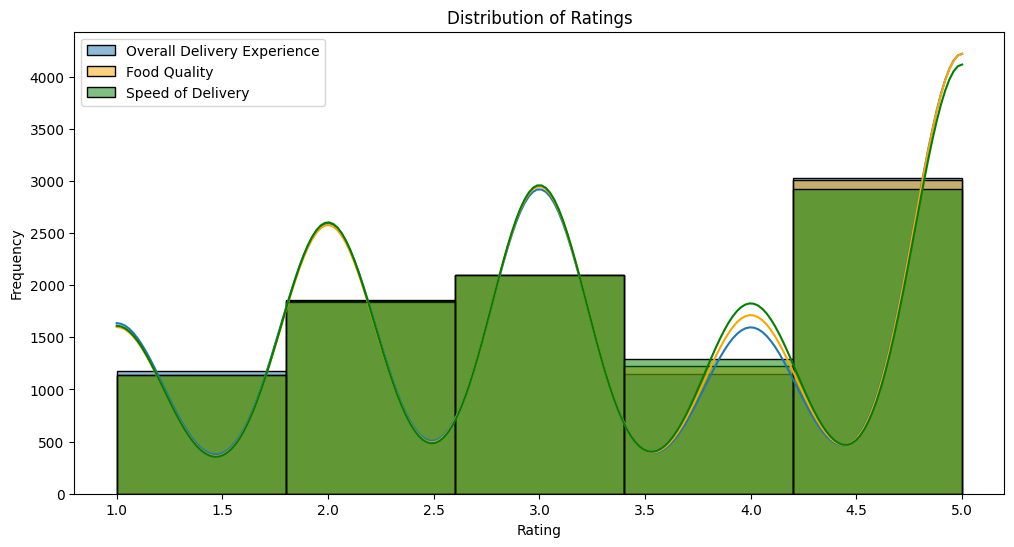

In [3]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Overall Delivery Experience'], bins=5, kde=True, label='Overall Delivery Experience')
sns.histplot(data['Food Quality'], bins=5, kde=True, label='Food Quality', color='orange')
sns.histplot(data['Speed of Delivery'], bins=5, kde=True, label='Speed of Delivery', color='green')
plt.legend()
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



**Distribution of Ratings (Histogram)**:
- The following histogram depicts the distribution of ratings for Overall Delivery Experience, Food Quality, and Speed of Delivery.
- As seen above, the distribution of ratings is crowded at either extreme end of the scale, with a significant amount of customers in all three categories giving extremely low or extremely high ratings. This would support the fact that the customer base is polarized in their opinions, either very positive or very negative.
- Distribution curves of all three categories are similar to each other but vary a little at frequency on different points, which reinforces that these factors in the customers' perceptions are very interlinked.


### 4. Create and Display Correlation Matrix
- Create a correlation matrix which would get the relationships between Food Quality, Speed of Delivery, etc.
- Display as a heat map of values, where colors represent intensity.
- The process would allow the researcher to establish the relationship between the differing factors; for example, if higher food quality necessarily means quicker delivery.
- It shows which variable influences others generally and in satisfaction.

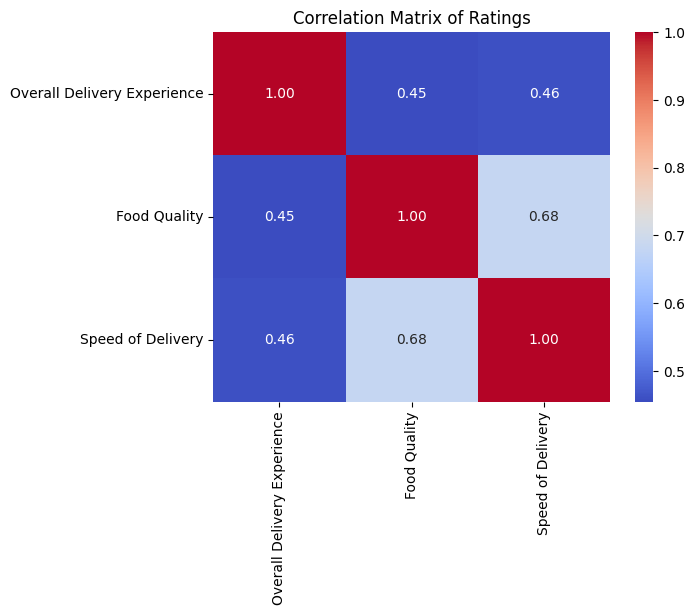

In [4]:
correlation_matrix = data[['Overall Delivery Experience', 'Food Quality', 'Speed of Delivery']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Ratings')
plt.show()

**Correlation Matrix of Ratings (Heatmap)**:
- Above heat map plots the correlation between Overall Delivery Experience, Food Quality, and Speed of Delivery
There is a strong positive relationship of 0.68 between Food Quality and Speed of Delivery which goes on to state that customers who rated one high are most likely rating the other too.
- The *Overall Delivery Experience* correlates with *Food Quality* and *Speed of Delivery* at a moderate level, at about 0.45 and 0.46, respectively, suggesting that both factors explain a high part of the overall customer satisfaction.

### 5. Cluster Analysis
- Segment customers into clusters using their ratings on Food Quality and Speed of Delivery based on the KMeans clustering algorithm.
- Plot a scatter plot to visualize the segments of customers arising from cluster analysis.
- This would uncover different segments of customers for whom effective marketing or service enhancement strategies can be targeted.
- Businesses, knowing the customer segments according to their preferences, can work at catering to diverse needs.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


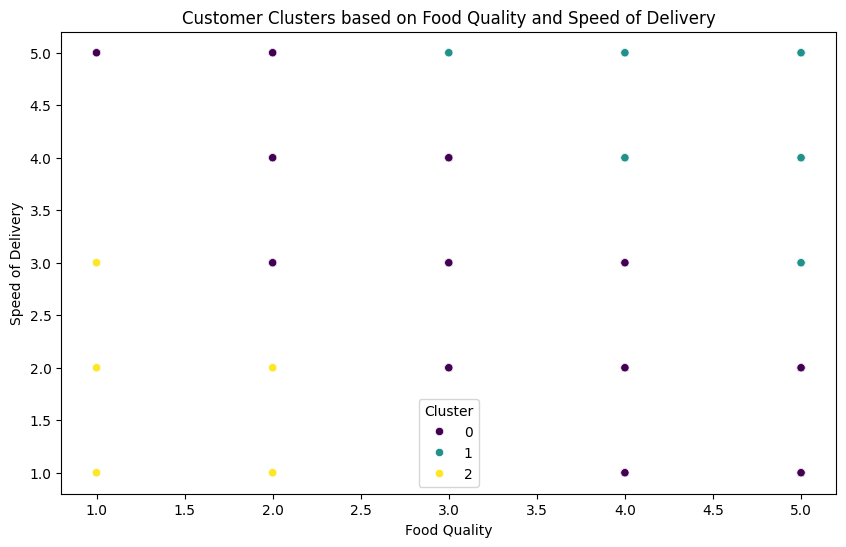

In [5]:
# Prepare data for clustering
features = data[['Food Quality', 'Speed of Delivery']]
kmeans = KMeans(n_clusters=3, random_state=42)  # Example: 3 clusters
data['Cluster'] = kmeans.fit_predict(features)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Food Quality', y='Speed of Delivery', hue='Cluster', palette='viridis')
plt.title('Customer Clusters based on Food Quality and Speed of Delivery')
plt.xlabel('Food Quality')
plt.ylabel('Speed of Delivery')
plt.legend(title='Cluster')
plt.show()

 **Customer Clusters based on Food Quality and Speed of Delivery (Scatter Plot)**:

  - There are three clusters, distinguished by color: 0 (purple), 1 (green), and 2 (yellow). Cluster 0 is scattered in lower Food Quality and lower Speed of Delivery ratings, while Cluster 2 tends to go up the rating towards higher Food Quality and Speed of Delivery. Cluster 1 is more scattered and could hint at ratings of a middle order for both the aspects.
  - A cluster that would also translate into a clear customer segmentation based on the perception of food quality and speed of delivery.


### 6. Calculate Average Ratings and Analyze by Order Accuracy

- Calculate the average for important ratings like Overall Delivery Experience, Food Quality, and Speed of Delivery.
- Split the data into order accuracy segments - yes/no - and calculate the average within these segments.
- It also depicts the influence of order accuracy on customer satisfaction.
- The result of this shall help prioritize what improvements would impact customers.

In [6]:
# Calculate average ratings
average_ratings = data[['Overall Delivery Experience', 'Food Quality', 'Speed of Delivery']].mean()
print(average_ratings)

# Group by Order Accuracy and calculate mean ratings
accuracy_analysis = data.groupby('Order Accuracy').mean()
print(accuracy_analysis)


Overall Delivery Experience    3.321609
Food Quality                   3.335054
Speed of Delivery              3.322792
dtype: float64
                Customer ID  Overall Delivery Experience  Food Quality  \
Order Accuracy                                                           
0               6630.186792                     3.290943      3.345660   
1               4814.664209                     3.333835      3.330826   

                Speed of Delivery   Cluster  
Order Accuracy                               
0                        3.290189  0.939623  
1                        3.335791  0.933504  


- The mean ratings for the overall delivery experience, food quality, and speed of delivery are all relatively consistent, hovering around 3.3 on a scale from 1 to 5; this reflects that customers are quite moderately satisfied with each of these areas.

- In this regard, the average ratings of overall delivery experience, food quality, and speed of delivery were slightly higher among those customers whose orders were correct (Yes) compared to customers with incorrect orders (No).


### 7. Build and Evaluate a Random Forest Classifier
- Train a Random Forest Classifier to predict Overall Delivery Experience from key features.
- Split the data into training and testing sets for model evaluation.
- Predict the results using the model and estimate the accuracy and performance of the predicted result using `accuracy_score` and `classification_report`.
- This is being made to construct a model that categorized as predictive and reliable for customer satisfaction, enabling any kind of prediction in the future.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = data[['Food Quality', 'Speed of Delivery', 'Order Accuracy']]
y = data['Overall Delivery Experience']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.6559139784946236
              precision    recall  f1-score   support

         1.0       0.69      0.58      0.63       347
         2.0       0.63      0.61      0.62       585
         3.0       0.63      0.69      0.66       604
         4.0       0.58      0.59      0.58       349
         5.0       0.71      0.72      0.71       905

    accuracy                           0.66      2790
   macro avg       0.65      0.64      0.64      2790
weighted avg       0.66      0.66      0.66      2790




### Interpretation:

- **Strengths:**
  - The model has high precision and recall for rating 5, indicating the model is predominantly good at predicting the highest rating.

- **Weaknesses:**
  - It performs relatively low in the case of rating 1 and rating 4. Precision and recall values have more errors in rating classification related to these ratings.

- **General Insights:**
  - F1-scores indicate balanced performance but, of course, there is further room for improvement, especially towards more accurate rating predictions for ratings 1 and 4. Overall, the model has an accuracy of 66% and reflects moderate performance that could be improved by more tuning or with higher-sophistication models.


### 8. Feature Importance
- Pull out the feature importances from the Random Forest model to determine which factors contribute most to the prediction.
- It helps in prioritizing features such as Food Quality, Speed of Delivery, and Order Accuracy based on their impact on overall satisfaction.
- Feature importance analysis enhances future decision-making by identifying which variables are most contributing to the improvement of customer service.
- Understanding key drivers of satisfaction helps focus resources on those areas that provide the most impact.

In [8]:
importances = model.feature_importances_
features = X.columns
for feature, importance in zip(features, importances):
    print(f'{feature}: {importance:.4f}')

Food Quality: 0.5136
Speed of Delivery: 0.4825
Order Accuracy: 0.0039



### Analysis:

- **Food Quality (0.5136):** This is the most important feature in the overall prediction of the delivery experience. This would, therefore, signify that customer satisfaction with respect to the food quality plays a major role in rating the overall delivery experience. A higher weight means it contributes a great deal to the model's predictions.

- **Speed of Delivery (0.4825):** This feature is also very high in its importance score, relatively close to Food Quality. That says it all: the faster the delivery, the more it adds to overall satisfaction. It is not quite as important as Food Quality, but still one of the major drivers of this model.


- **Order Accuracy (0.0039):** This is a very low importance score. It directly states that, in the overall prediction of delivery experience, this feature contributes minimally. This could mean that, though relevant, order accuracy tends to have a lower impact on the overall rating than Food Quality and Speed of Delivery within this particular dataset.


### Interpretation:

- **High Importance Features:** The high-importance features are representative of the food quality and speed of delivery as the important drivers of satisfaction in this data. This also aligns with the general intuition that food quality and delivery time is very critical for positive customer experiences.


- **Low Importance Feature:** The relatively low importance of the Order Accuracy feature in the model's predictions might indicate that this feature, though a factor considered, is less critical compared to the other features in determining overall satisfaction. This could also be one of the points for further investigation if improvement in this aspect could bring greater improvements in customer satisfaction.

### Conclusion

From the customer survey data for this delivery service, several key points are deduced about customers' satisfaction and what drives it. The following is a summary of the results and implications:


1. **Data Overview and Cleaning**:
  - The dataset contains feedback about the general delivery experience, quality of food, speed of delivery, and correctness of the order from 10,616 customers.
  - Missing value handling and conversion of categorical variables to numerical format were followed by cleaning and preparing the dataset.

2. **Distribution of Ratings**:
   - Overall ratings for delivery experience, food quality, and speed of delivery are biased towards extreme ends rather than mid-level ratings.
  - This polarized distribution gives the indication that the customer experiences are either extremely good or extremely bad.

3. **Correlation Analysis**:
   - The correlation between the quality of food and speed of delivery has been very strong and positive. Improvement in one yields better ratings on the other.
  - Overall delivery experience is moderately correlated with food quality and speed of service, showing that both factors are highly important for overall satisfaction.

4. **Cluster Analysis**:
   - KMeans clustering identified three distinct customer segments based on food quality and speed of delivery.
   - These clusters bring into focus the varied customer preferences and levels of satisfaction, thus proving that perhaps targeted strategies might work well in different segments of customers.

5. **Impact of Order Accuracy**:
   - Customers whose orders were correct showed about 5% more satisfaction in the overall delivery experience, quality of food, and speed of delivery compared to those customers with wrong orders.
  - This stresses that delivery needs to be done right, but is not as important as some of the other points highlighted.

6. **Predictive Modeling**:
  - A Random Forest Classifier was used to predict the probability of an overall good delivery experience given responses to food quality, speed of delivery, and order accuracy.
  - Using the model, about 66% of the instances were classified correctly. Strong predictors of overall satisfaction included food quality and speed of delivery, whereas order accuracy was a weak influencer with minimal effects on the models' predictions.


7. **Feature Importance**:
   - Food quality turned out to be the most influential feature related to overall satisfaction, closely followed by speed of delivery.
   - While relevant, the accuracy of the orders was not as powerful in determining overall customer satisfaction.